Imports and setup

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (11.7, 8.27)
plt.rcParams['image.cmap'] = 'viridis'


In [27]:
df = pd.read_csv('Data/titanic_train.csv')


Task 1

In [28]:
df_without_cabin = df.drop('Cabin', axis=1)
df_without_cabin = df_without_cabin.dropna()

sns.pairplot(df_without_cabin[['Age', 'Fare', 'Pclass', 'Sex', 'SibSp',
             'Parch', 'Embarked', 'Survived']], hue='Survived')


Task 2

<Axes: xlabel='Fare', ylabel='Pclass'>

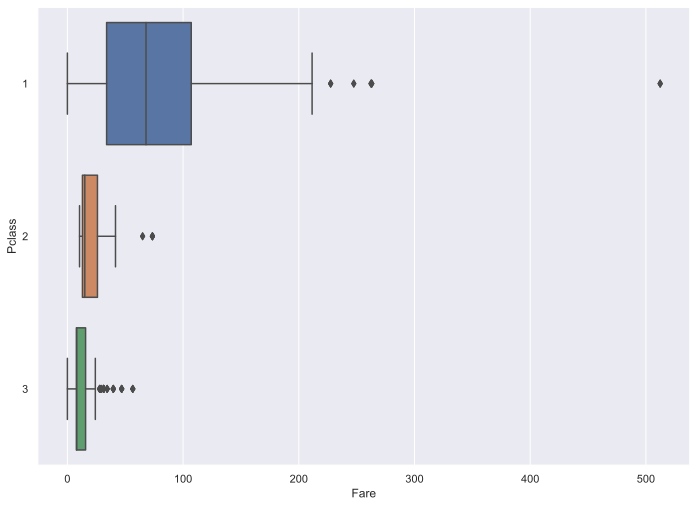

In [29]:
sns.boxplot(df_without_cabin[['Pclass', 'Fare']],
            x='Fare', y='Pclass', orient='h')


Task 2 Optional

<Axes: xlabel='Fare', ylabel='Pclass'>

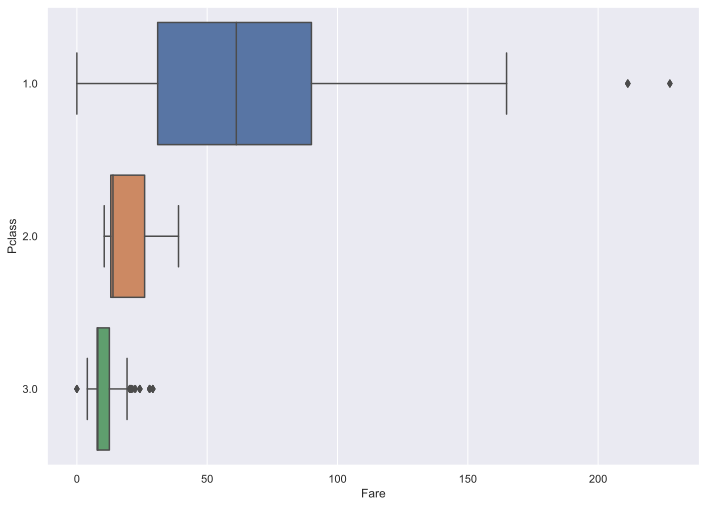

In [30]:
df_without_cabin['Fare_no_out'] = df_without_cabin.groupby('Pclass')[
    'Fare'].transform('std')
df_cleared = df_without_cabin.where(
    abs(df_without_cabin['Fare'] - df_without_cabin['Fare_no_out'])
    < df_without_cabin['Fare_no_out']*2)
sns.boxplot(df_cleared[['Pclass', 'Fare']], x='Fare', y='Pclass', orient='h')


Task 3

<Axes: xlabel='Sex', ylabel='count'>

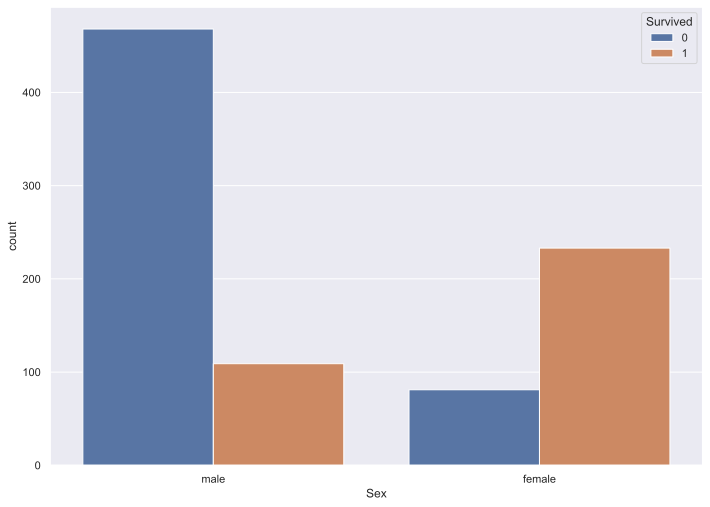

In [31]:
sns.countplot(df, x='Sex', hue='Survived')


Task 4

<Axes: xlabel='Pclass', ylabel='count'>

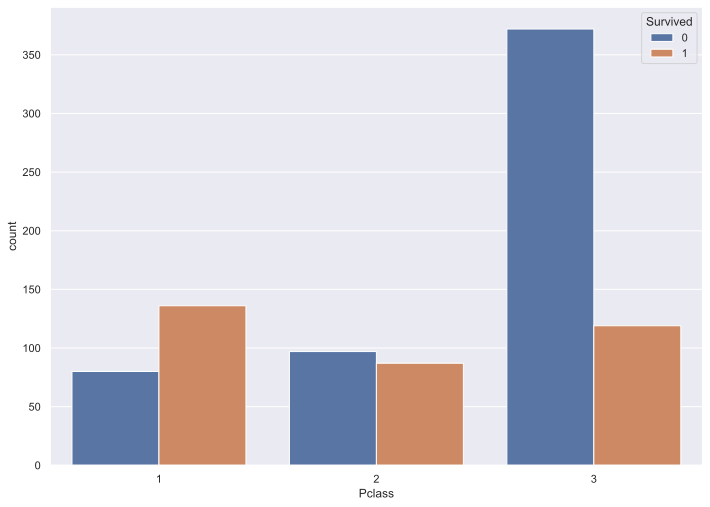

In [32]:
sns.countplot(df, x='Pclass', hue='Survived')

Task 5

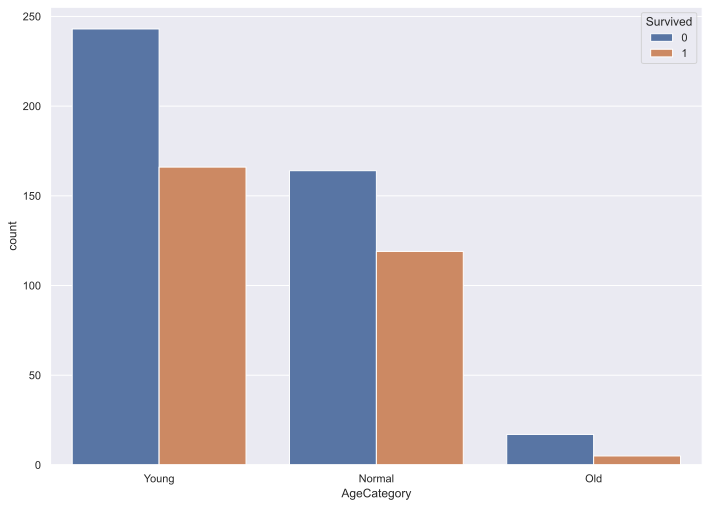

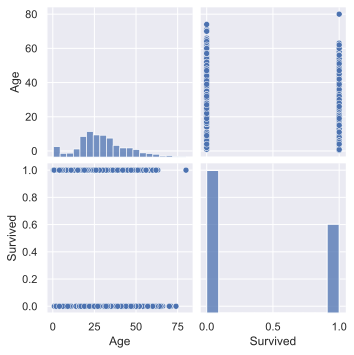

In [33]:
ages = [0, 30, 60, 1000]
categories = ['Young', 'Normal', 'Old']
df['AgeCategory'] = pd.cut(df['Age'], bins=ages, labels=categories)

sns.countplot(df, x='AgeCategory', hue='Survived')
sns.pairplot(data=df[['Age', 'Survived']])